In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading Datasets**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import warnings
from tqdm.auto import tqdm
tqdm.pandas()
warnings.filterwarnings('ignore')
d1 = pd.read_csv('/content/drive/MyDrive/CNN_Articels_clean.csv')
d2 = pd.read_csv('/content/drive/MyDrive/news-article-categories.csv')

In [ ]:
d1 = d1[d1.Category != 'vr']
d1 = d1[d1.Category != 'travel']
d1 = d1[d1.Category != 'style']

In [ ]:
d2.category = d2.category.str.lower()

In [ ]:
d2['category'] = d2['category'].replace('arts & culture', 'culture')

In [ ]:
import re
## Regular expression to find all words in brackets or parentheses where "CNN" is present
pattern = r'[\[\(]([^]\)]*CNN[^]\)]*)[\]\)]'

# Create a list to store unique combinations of words inside brackets or parentheses
unique_combinations = []

# Iterate over each row and update the list
for text in d1['Article text'].astype(str):  # Convert to string, handle potential missing values
    matches = re.findall(pattern, text)
    unique_combinations.extend(matches)

# Convert the list to a set to keep unique values
unique_combinations = set(unique_combinations)

# Function to remove combinations from text
def remove_combinations(text):
    if pd.notna(text):  # Check for missing values
        for combination in unique_combinations:
            text = text.replace(combination, '')
    return text

# Apply the function to the 'Article text' column
d1['Article text'] = d1['Article text'].apply(remove_combinations)


In [ ]:
# Keep only two columns and rename them
d1 = d1[['Article text', 'Category']].rename(columns={'Article text': 'article', 'Category': 'category'})
# Keep only two columns and rename them
d2 = d2[['body', 'category']].rename(columns={'body': 'article'})

In [ ]:
d1['category'].unique()

array(['news', 'business', 'health', 'entertainment', 'sport', 'politics'],
      dtype=object)

In [ ]:
d2['category'].unique()

array(['culture', 'business', 'comedy', 'crime', 'education',
       'entertainment', 'environment', 'media', 'politics', 'religion',
       'science', 'sports', 'tech', 'women'], dtype=object)

In [ ]:
old_value = 'sports'
new_value = 'sport'
d2['category'] = d2['category'].replace(old_value, new_value)

In [ ]:
d2['category'].unique()

array(['culture', 'business', 'comedy', 'crime', 'education',
       'entertainment', 'environment', 'media', 'politics', 'religion',
       'science', 'sport', 'tech', 'women'], dtype=object)

In [ ]:
d1['category'].value_counts()

news             18077
sport            15542
politics          2461
business           854
health             557
entertainment      413
Name: category, dtype: int64

In [ ]:
d2['category'].value_counts()

culture          1002
business          501
entertainment     501
environment       501
politics          501
religion          501
sport             501
tech              501
women             501
education         490
comedy            380
science           350
media             347
crime             300
Name: category, dtype: int64

In [ ]:
dataset = pd.concat([d1, d2], ignore_index=True)

In [ ]:
dataset['category'].unique()

array(['news', 'business', 'health', 'entertainment', 'sport', 'politics',
       'culture', 'comedy', 'crime', 'education', 'environment', 'media',
       'religion', 'science', 'tech', 'women'], dtype=object)

In [ ]:
dataset['category'].value_counts()

news             18077
sport            16043
politics          2962
business          1355
culture           1002
entertainment      914
health             557
environment        501
religion           501
tech               501
women              501
education          490
comedy             380
science            350
media              347
crime              300
Name: category, dtype: int64

In [ ]:
dataset['category'] = dataset['category'].astype('category')

# Category to number mapping
dataset['category_code'] = dataset.category
dataset['category_code'] = dataset.category.cat.codes

In [ ]:
dataset.shape

(44781, 3)

In [ ]:
dataset.head()

,article,category,category_code
0,"()Right now, there's a shortage of truck driv...",news,9
1,()Working in a factory or warehouse can mean ...,news,9
2,"()In a Hong Kong warehouse, a swarm of autono...",news,9
3,The pandemic thrust the working world into a n...,business,0
4,New York ( Business)March Madness isn't just f...,business,0


In [ ]:
## Remove empty parentheses from the beginning of each row
dataset['article'] = dataset['article'].str.replace(r'^\(\)', '')


In [ ]:
dataset.head()

,article,category,category_code
0,"()Right now, there's a shortage of truck driv...",news,9
1,()Working in a factory or warehouse can mean ...,news,9
2,"()In a Hong Kong warehouse, a swarm of autono...",news,9
3,The pandemic thrust the working world into a n...,business,0
4,New York ( Business)March Madness isn't just f...,business,0


In [ ]:
dataset.shape

(44781, 3)

In [ ]:
!pip install num2words

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=647627424594a90f82fe7f688e4f3f75856e22742972680a17dc0c5090305ea8
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


**Dataset Cleaning**

In [ ]:
# RE - library for regular expression
import re

import num2words

# NLTK - library for symbolic and statistical natural language processing(NLP) f
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
def clean_text(web_text):

    # Lowercasing
    web_text = str(web_text)
    text_clean = web_text.lower()

    # Replace currency symbols with corresponding words
    money_char_mapping = {"$": "dollar", "€": "euro", "£": "pound", "¥": "yen", "₣": "franc", "₹": "rupee"}
    text_clean = "".join([money_char_mapping.get(char, char) for char in text_clean])

    tokens = word_tokenize(text_clean)

    cleaned_tokens = []
    for i in tokens:
        try:
            cleaned_token = num2words.num2words(i, lang='en') if i.isdigit() else i
            cleaned_tokens.append(cleaned_token)
        except Exception as e:
            print(f"Error processing token: {i}, Error: {e}")
            cleaned_tokens.append(i)

    # Convert numeric tokens to words using num2words
    text_clean = " ".join(cleaned_tokens)

    # Remove non-alphabetic characters
    text_clean = re.sub(r'[^a-z]', ' ', text_clean)

    tokens = word_tokenize(text_clean)

    # Remove stop words
    stop_words = set(nltk.corpus.stopwords.words("english"))
    tokens_no_stopwords = [word for word in tokens if word not in stop_words]

    # Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_list = [wordnet_lemmatizer.lemmatize(word) for word in tokens_no_stopwords]

    return " ".join(lemmatized_list)


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
dataset["article"] = dataset["article"].apply(clean_text)


Error processing token: ³, Error: [<class 'decimal.ConversionSyntax'>]
Error processing token: ⁸, Error: [<class 'decimal.ConversionSyntax'>]
Error processing token: ¹, Error: [<class 'decimal.ConversionSyntax'>]
Error processing token: ², Error: [<class 'decimal.ConversionSyntax'>]
Error processing token: ³, Error: [<class 'decimal.ConversionSyntax'>]
Error processing token: ⁴, Error: [<class 'decimal.ConversionSyntax'>]
Error processing token: ⁵, Error: [<class 'decimal.ConversionSyntax'>]
Error processing token: ⁶, Error: [<class 'decimal.ConversionSyntax'>]
Error processing token: ⁷, Error: [<class 'decimal.ConversionSyntax'>]
Error processing token: ⁸, Error: [<class 'decimal.ConversionSyntax'>]
Error processing token: ¹, Error: [<class 'decimal.ConversionSyntax'>]
Error processing token: ², Error: [<class 'decimal.ConversionSyntax'>]
Error processing token: ³, Error: [<class 'decimal.ConversionSyntax'>]
Error processing token: ⁴, Error: [<class 'decimal.ConversionSyntax'>]
Error 

In [ ]:
dataset.shape

(44781, 3)

In [ ]:
dataset.head()

,article,category,category_code
0,right shortage truck driver u worldwide exacer...,news,9
1,working factory warehouse mean task repetition...,news,9
2,hong kong warehouse swarm autonomous robot wor...,news,9
3,pandemic thrust working world new reality marc...,business,0
4,new york business march madness n college bask...,business,0


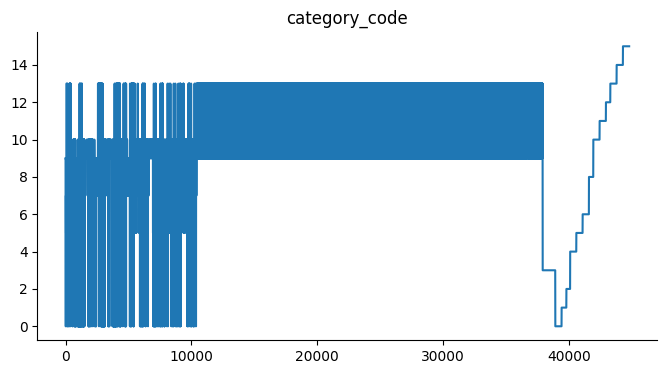

In [ ]:
# @title category_code

from matplotlib import pyplot as plt
dataset['category_code'].plot(kind='line', figsize=(8, 4), title='category_code')
plt.gca().spines[['top', 'right']].set_visible(False)

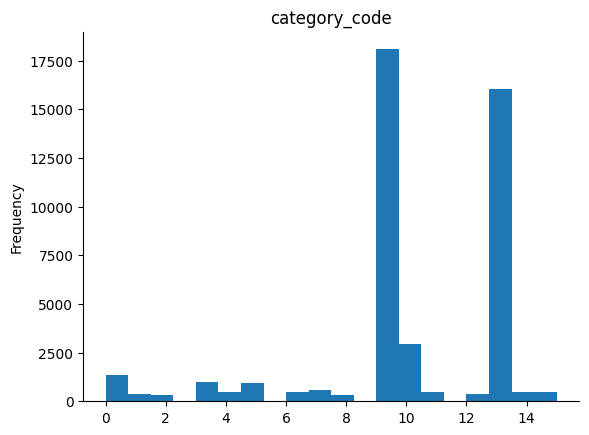

In [ ]:
# @title category_code

from matplotlib import pyplot as plt
dataset['category_code'].plot(kind='hist', bins=20, title='category_code')
plt.gca().spines[['top', 'right',]].set_visible(False)

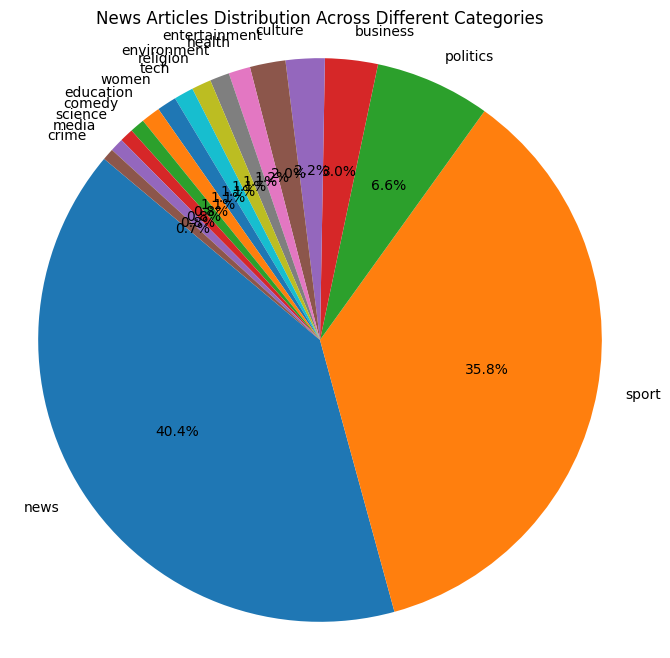

In [ ]:
# Calculate value counts
value_counts = dataset['category'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('News Articles Distribution Across Different Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
d = dataset

Saving cleaned dataset in csv file

In [ ]:
d.head()

In [ ]:
d.to_csv('cleanedUB-classification.csv', index=False)

# **Cleaned Dataset Model Training and Evaluation**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import FastText, Word2Vec, KeyedVectors
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/cleanedUB-classification.csv")

In [ ]:
dataset.head()

,article,category,category_code
0,right shortage truck driver u worldwide exacer...,news,9
1,working factory warehouse mean task repetition...,news,9
2,hong kong warehouse swarm autonomous robot wor...,news,9
3,pandemic thrust working world new reality marc...,business,0
4,new york business march madness n college bask...,business,0


In [ ]:
dataset.shape

(44781, 3)

Splitting dataset into training and testing data

In [ ]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
from sklearn.impute import SimpleImputer

# Preprocess target variable (category)
def preprocess_text_data(data):
    # Fill missing values with a placeholder value or use imputation as needed
    imputer = SimpleImputer(strategy='most_frequent')  # Impute with the most frequent category
    data = imputer.fit_transform(data)
    return data


# Example usage:
train_df['article'] = preprocess_text_data(train_df[['article']])
test_df['article'] = preprocess_text_data(test_df[['article']])


In [ ]:
# Check if the column contains any NaN values
if train_df['category'].isna().any():
    print(f"The column contains NaN values.")
else:
    print(f"The column  does not contain NaN values.")


The column  does not contain NaN values.


In [ ]:
nan_count = train_df['category'].isna().sum()
print(f"The column  contains {nan_count} NaN values.")

The column  contains 0 NaN values.


**Word Embedding Techniques**

In [ ]:
def apply_tfidf(X_train, X_test):
    tfidf_vectorizer = TfidfVectorizer(max_features=3000)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    return X_train_tfidf, X_test_tfidf

def apply_embedding(model, data):
    if hasattr(model, 'wv'):  # Check if the model has the 'wv' attribute (Word2Vec-like model)
        return np.array([model.wv[word] if word in model.wv else np.zeros(model.vector_size) for word in data])
    else:  # Use the model directly (KeyedVectors-like model)
        return np.array([model[word] if word in model else np.zeros(model.vector_size) for word in data])

def train_fasttext(X_train):
    model = FastText(sentences=X_train, vector_size=100, window=5, min_count=5, workers=4, sg=1)
    return model

def train_word2vec(X_train):
    model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=5, workers=4)
    return model

def apply_count_vectorizer(X_train, X_test):
    count_vectorizer = CountVectorizer(max_features=3000)
    X_train_count = count_vectorizer.fit_transform(X_train)
    X_test_count = count_vectorizer.transform(X_test)
    return X_train_count, X_test_count

def train_model(X_train, y_train, model):
    # Use the appropriate training method for your model
    # Adjust this function based on the specifics of your models
    model.fit(X_train, y_train)
    return model

**Classification Models**

In [ ]:
# Classification Models
classification_models = {
    'SVM': SVC(kernel="sigmoid"),
    'Random Forest': RandomForestClassifier(n_estimators=100,
                                            max_depth=None,  # You can specify a value based on your dataset
                                            min_samples_split=2,
                                            min_samples_leaf=1,
                                            max_features='sqrt',
                                            class_weight='balanced',  # Adjust based on class distribution
                                            random_state=42), # Set a seed for reproducibility),
    'Decision Tree': DecisionTreeClassifier(criterion='gini',
                                            splitter='best',
                                            max_depth=None,
                                            min_samples_split=2,
                                            min_samples_leaf=1,
                                            max_features=None,
                                            random_state=None,
                                            class_weight=None),
    'Multinomial Naive Bayes': MultinomialNB()
}


**Model Training and Evaluation**

Training and evaluating SVM...
Applying CountVectorizer...


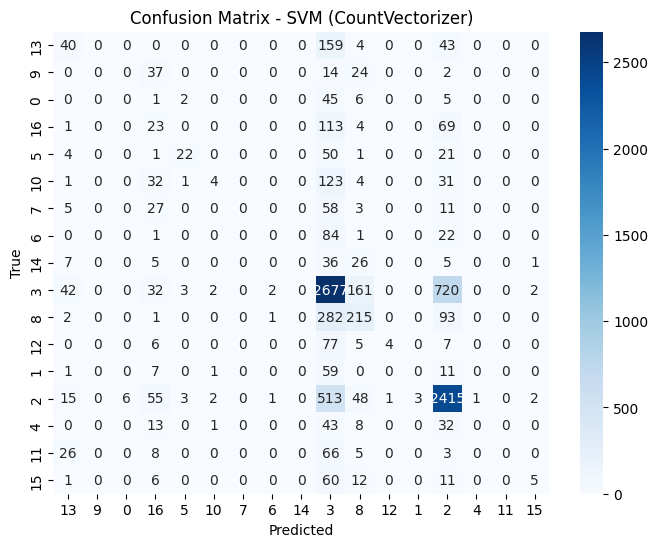

Applying TF-IDF...


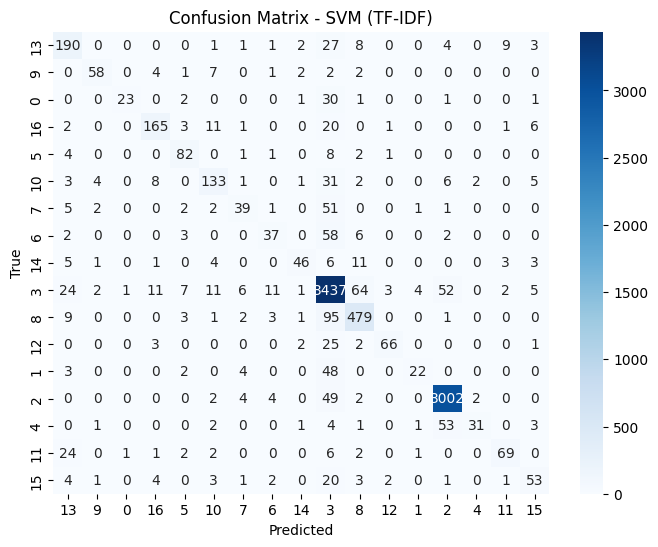

Applying FastText...


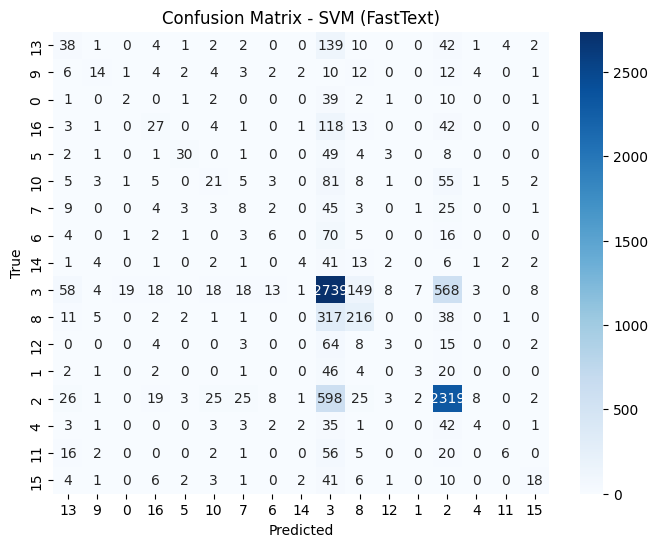

Applying Word2Vec...


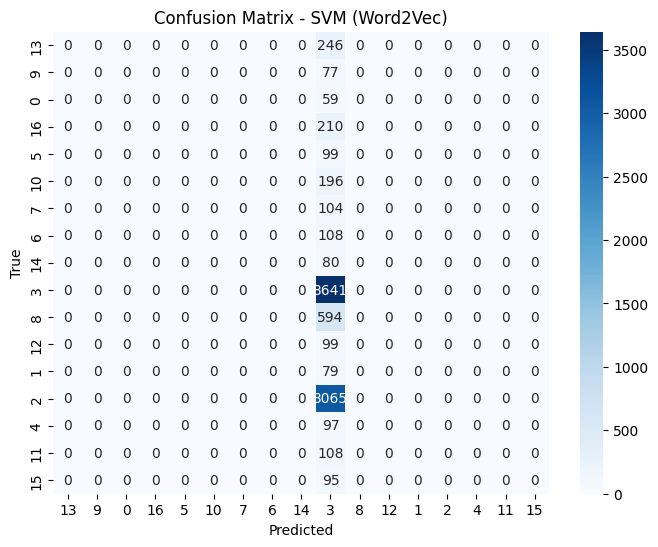

Training and evaluating Random Forest...
Applying CountVectorizer...


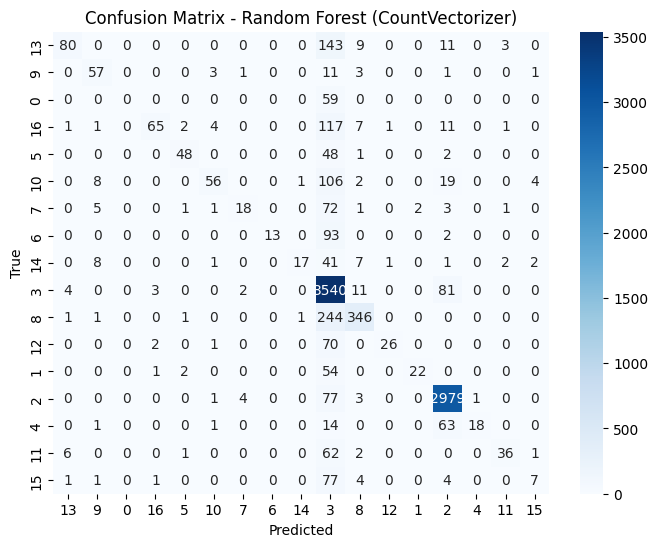

Applying TF-IDF...


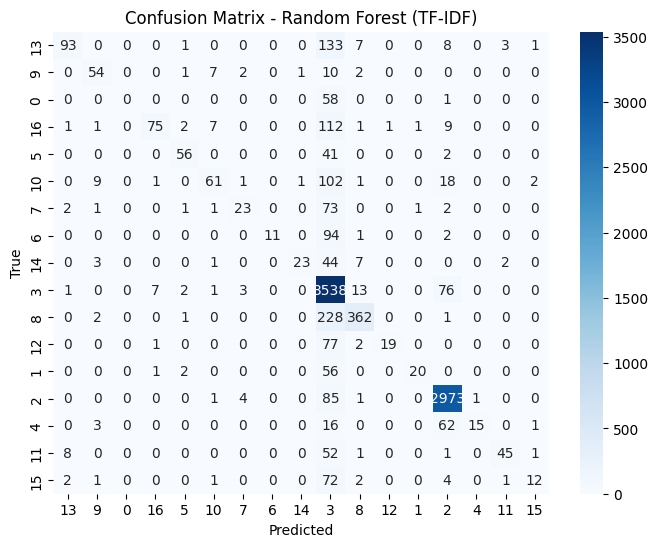

Applying FastText...


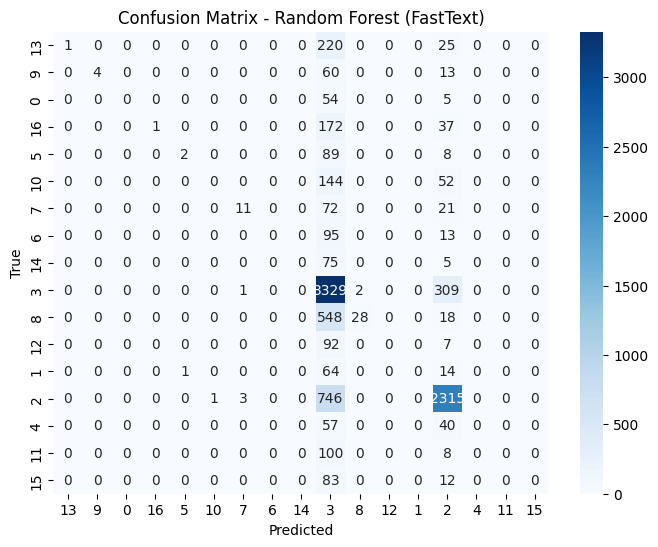

Applying Word2Vec...


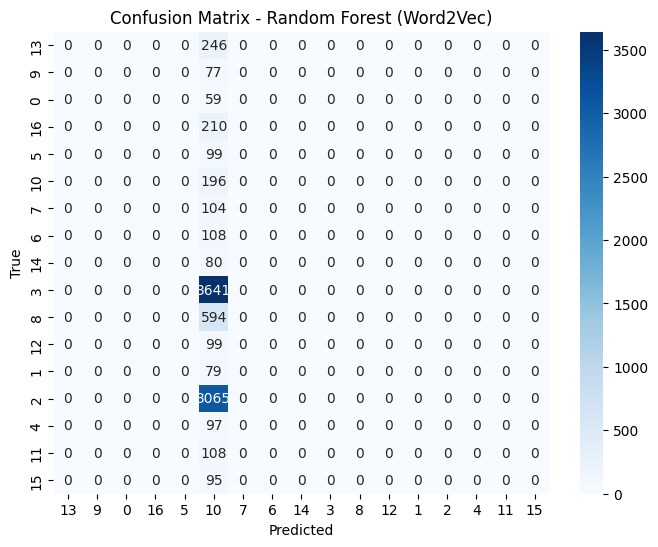

Training and evaluating Decision Tree...
Applying CountVectorizer...


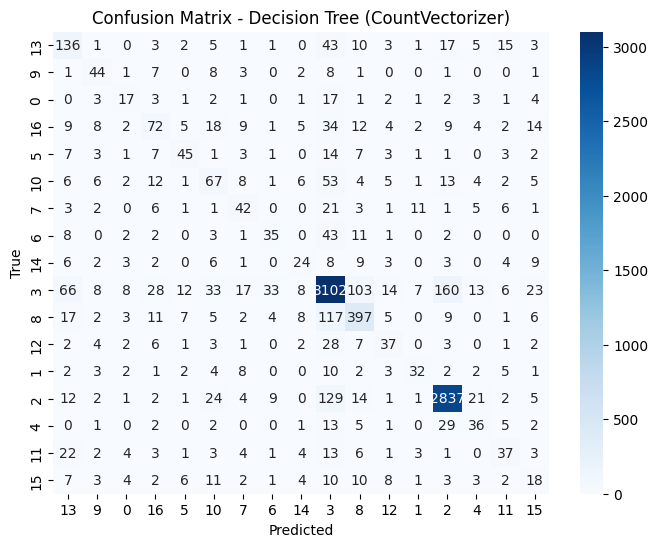

Applying TF-IDF...


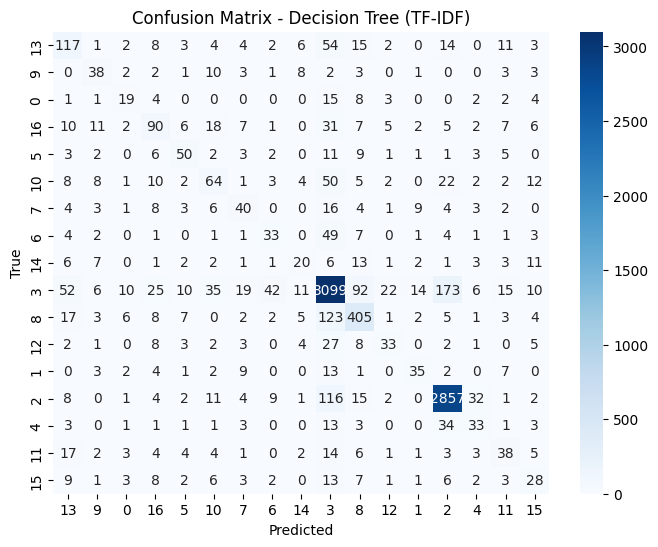

Applying FastText...


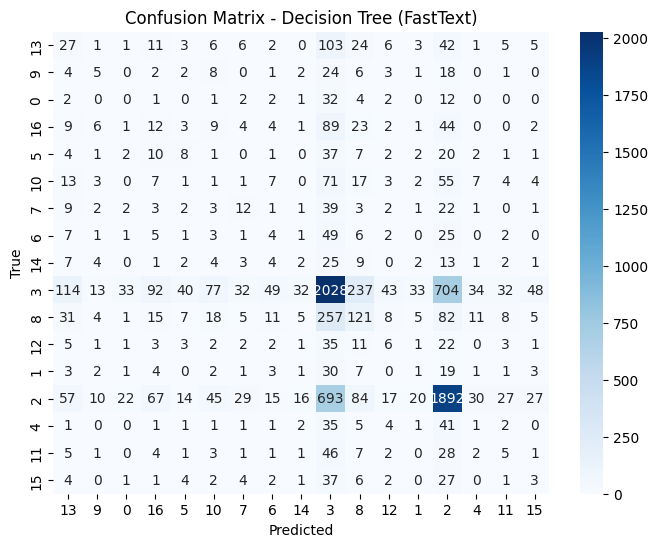

Applying Word2Vec...


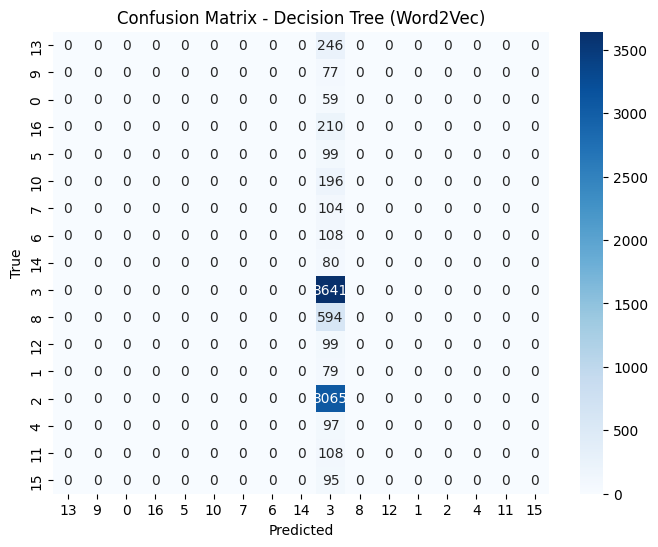

Training and evaluating Multinomial Naive Bayes...
Applying CountVectorizer...


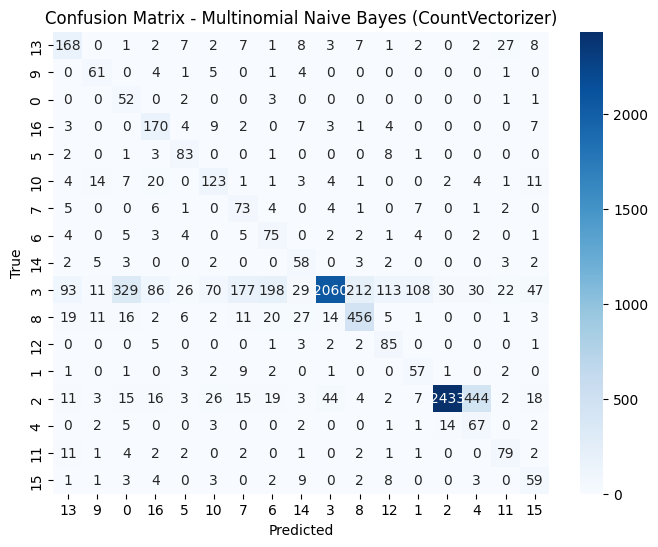

Applying TF-IDF...


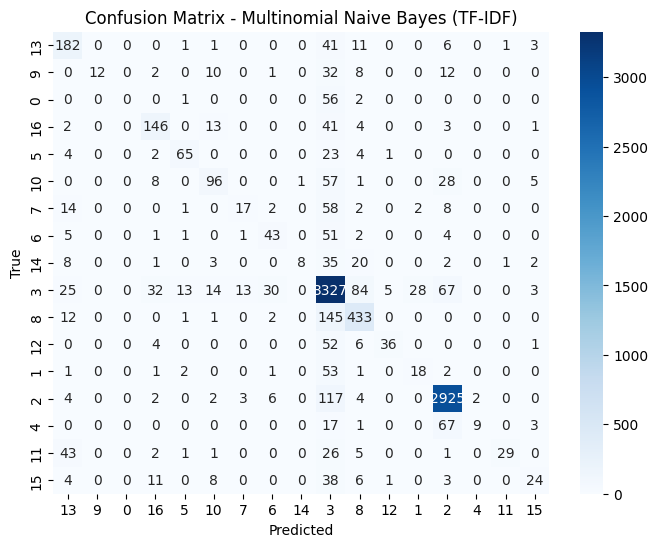

Applying FastText...
Applying Word2Vec...


ValueError: All arrays must be of the same length

In [ ]:
from sklearn.metrics import classification_report

results = []

for model_name, model in classification_models.items():
    print(f"Training and evaluating {model_name}...")

    model_results = {'Word Embedding Technique': [], 'Training Accuracy': [], 'Test Accuracy': [],
                     'Precision': [], 'Recall': [], 'F1-Score': []}

    for embedding_technique in ['CountVectorizer', 'TF-IDF', 'FastText', 'Word2Vec']:
        print(f"Applying {embedding_technique}...")

        # Initialize a new model variable for each embedding technique
        embedding_model = None

        if model_name == 'Multinomial Naive Bayes' and embedding_technique not in ['TF-IDF', 'CountVectorizer']:
           # Skip other embedding techniques for Multinomial Naive Bayes
             continue


        if embedding_technique == 'TF-IDF':
            X_train, X_test = apply_tfidf(train_df['article'], test_df['article'])
        elif embedding_technique == 'FastText':
            embedding_model = train_fasttext(train_df['article'])
            X_train, X_test = apply_embedding(embedding_model, train_df['article']), apply_embedding(embedding_model, test_df['article'])
        elif embedding_technique == 'Word2Vec':
            embedding_model = train_word2vec(train_df['article'])
            X_train, X_test = apply_embedding(embedding_model, train_df['article']), apply_embedding(embedding_model, test_df['article'])
        elif embedding_technique == 'CountVectorizer':
            X_train, X_test = apply_count_vectorizer(train_df['article'], test_df['article'])

        # Train the model
        trained_model = train_model(X_train, train_df['category_code'], model)

        # Test Accuracy
        y_test_pred = trained_model.predict(X_test)
        test_accuracy = accuracy_score(test_df['category_code'], y_test_pred)

        # Precision, Recall, F1-Score
        report = classification_report(test_df['category_code'], y_test_pred, output_dict=True)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1_score = report['weighted avg']['f1-score']

        # Store results
        model_results['Word Embedding Technique'].append(embedding_technique)
        model_results['Test Accuracy'].append(test_accuracy)
        model_results['Precision'].append(precision)
        model_results['Recall'].append(recall)
        model_results['F1-Score'].append(f1_score)

        # Confusion Matrix
        cm = confusion_matrix(test_df['category'], y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['category'].unique(),
                    yticklabels=train_df['category'].unique())
        plt.title(f'Confusion Matrix - {model_name} ({embedding_technique})')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.savefig(f"{model_name}_{embedding_technique}_confusion_matrix.pdf", format='pdf', bbox_inches='tight')
        plt.show()

    # Append model-specific results to the main results list
    results.append({model_name: model_results})



In [ ]:
results_without_train_accuracy = [{model_name: {k: v for k, v in model_result.items() if k != 'Training Accuracy'}}
                                  for result in results for model_name, model_result in result.items()]


In [ ]:
results_without_train_accuracy

[{'SVM': {'Word Embedding Technique': ['CountVectorizer',
    'TF-IDF',
    'FastText',
    'Word2Vec'],
   'Test Accuracy': [0.6034386513341521,
    0.8855643630679915,
    0.6093558110974656,
    0.40649771128726137],
   'Precision': [0.5475770555771828,
    0.8817042684008003,
    0.5689489372285228,
    0.1652403892817817],
   'Recall': [0.6034386513341521,
    0.8855643630679915,
    0.6093558110974656,
    0.40649771128726137],
   'F1-Score': [0.5602358748093337,
    0.878418993246992,
    0.5793421192495771,
    0.23496716412079988]}},
 {'Random Forest': {'Word Embedding Technique': ['CountVectorizer',
    'TF-IDF',
    'FastText',
    'Word2Vec'],
   'Test Accuracy': [0.8181310706709836,
    0.823936585910461,
    0.6353689851512784,
    0.021882326671876746],
   'Precision': [0.8273560208890349,
    0.8343034911713937,
    0.6357981604865537,
    0.00047883622057472836],
   'Recall': [0.8181310706709836,
    0.823936585910461,
    0.6353689851512784,
    0.021882326671876746],

In [ ]:
# Save results to a table
results_df = pd.DataFrame()
for result in results_without_train_accuracy:
    for model_name, model_result in result.items():
        temp_df = pd.DataFrame(model_result)
        temp_df['Model'] = model_name
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Save results to a CSV file
results_df.to_csv('classification_results.csv', index=False)


**Results Visualization**

In [ ]:
results_df

,Word Embedding Technique,Test Accuracy,Precision,Recall,F1-Score,Model
0,CountVectorizer,0.603439,0.547577,0.603439,0.560236,SVM
1,TF-IDF,0.885564,0.881704,0.885564,0.878419,SVM
2,FastText,0.609356,0.568949,0.609356,0.579342,SVM
3,Word2Vec,0.406498,0.165240,0.406498,0.234967,SVM
4,CountVectorizer,0.818131,0.827356,0.818131,0.786564,Random Forest
5,TF-IDF,0.823937,0.834303,0.823937,0.795088,Random Forest
6,FastText,0.635369,0.635798,0.635369,0.556067,Random Forest
7,Word2Vec,0.021882,0.000479,0.021882,0.000937,Random Forest
8,CountVectorizer,0.779055,0.776245,0.779055,0.777110,Decision Tree
9,TF-IDF,0.781400,0.776530,0.781400,0.778654,Decision Tree


In [ ]:
df = results_df

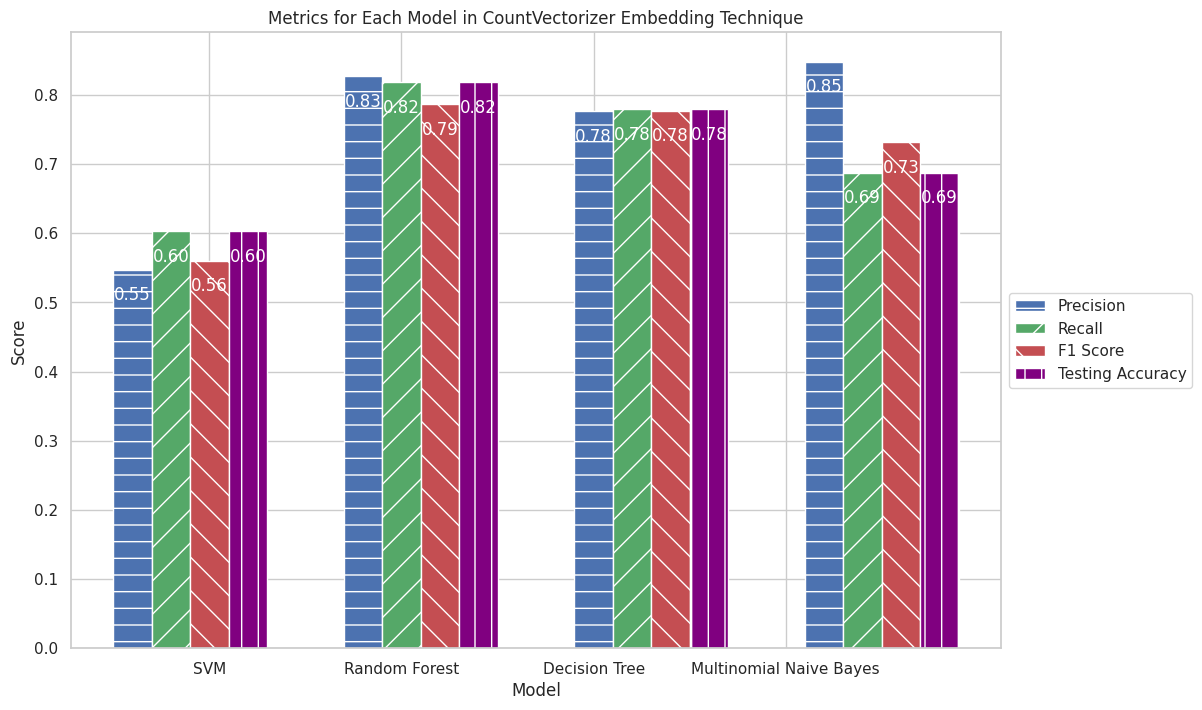

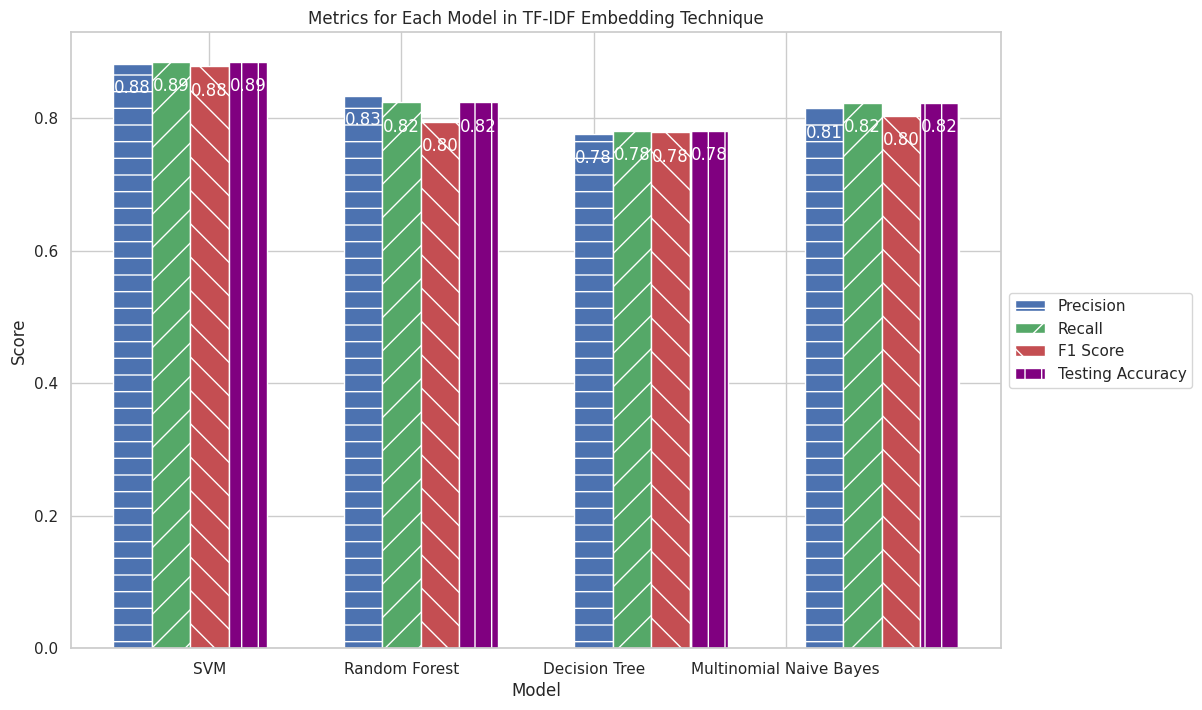

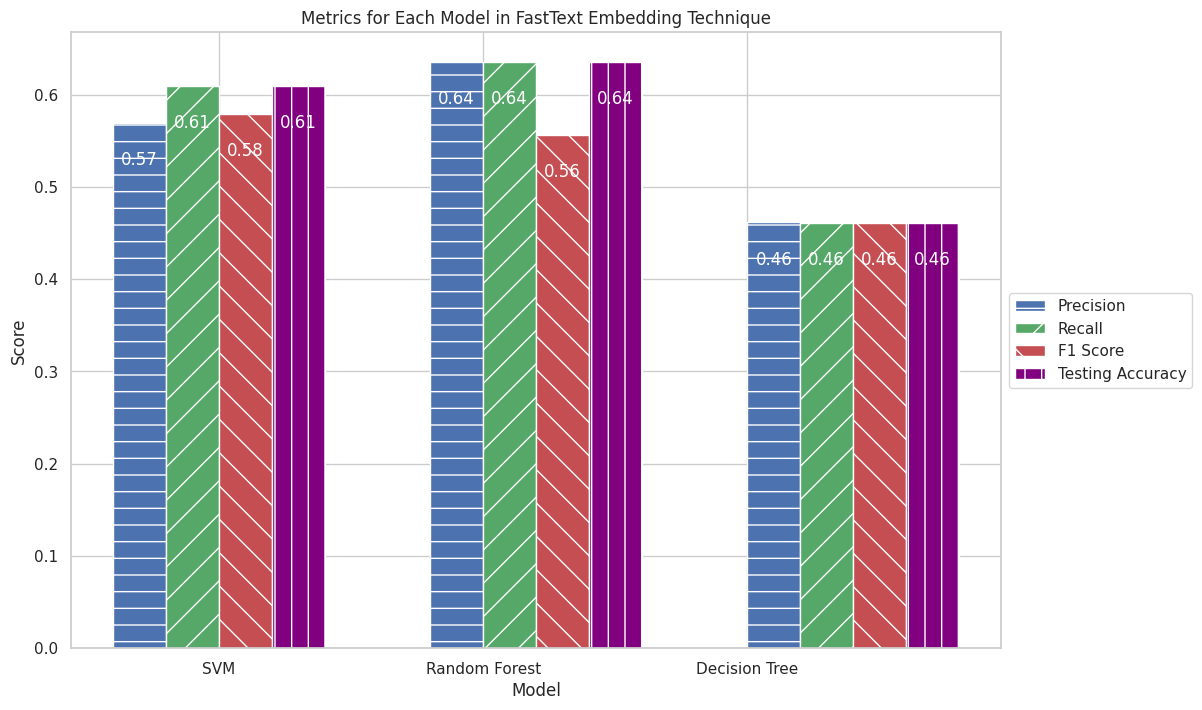

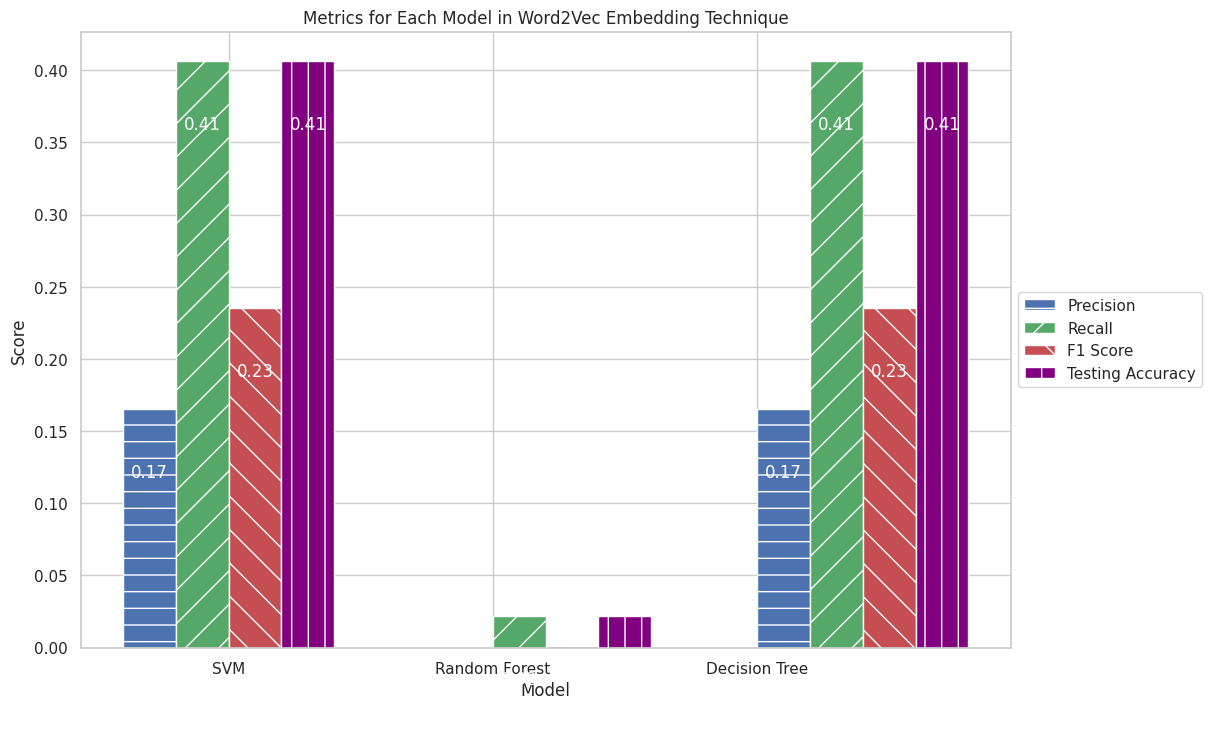

Charts displayed.


In [ ]:

# Loop through unique word embedding techniques
embedding_techniques = df['Word Embedding Technique'].unique()

for embedding_technique in embedding_techniques:
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))

    # Filter DataFrame for the current word embedding technique
    df_filtered = df[df['Word Embedding Technique'] == embedding_technique]

    if not df_filtered.empty:  # Check if DataFrame is not empty
        # Loop through unique models
        models = df_filtered['Model'].unique()

        # Define hatch patterns for each metric
        hatch_patterns = {'Precision': '-', 'Recall': '/', 'F1-Score': '\\', 'Testing Accuracy': '|'}

        # Plot precision, recall, f1, and accuracy for each model in a group
        for i, model in enumerate(models):
            df_model = df_filtered[df_filtered['Model'] == model]
            if not df_model.empty:  # Check if DataFrame for the model is not empty
                x_pos = i + 0.2 * (i - len(models) / 2)  # Adjust the position for each model

                # Plot precision bar with horizontal lines and specify label only once
                plt.bar(x_pos, df_model['Precision'].values[0], width=0.2, align='center', color='b', label='Precision' if i == 0 else None, hatch=hatch_patterns['Precision'])
                plt.text(x_pos, df_model['Precision'].values[0] - 0.05, f'{df_model["Precision"].values[0]:.2f}', ha='center', va='bottom', rotation=0, color='white')

                # Plot recall bar with diagonal lines towards right
                plt.bar(x_pos + 0.2, df_model['Recall'].values[0], width=0.2, align='center', color='g', label='Recall' if i == 0 else None, hatch=hatch_patterns['Recall'])
                plt.text(x_pos + 0.2, df_model['Recall'].values[0] - 0.05, f'{df_model["Recall"].values[0]:.2f}', ha='center', va='bottom', rotation=0, color='white')

                # Plot F1 Score bar with diagonal lines towards left
                plt.bar(x_pos + 0.4, df_model['F1-Score'].values[0], width=0.2, align='center', color='r', label='F1 Score' if i == 0 else None, hatch=hatch_patterns['F1-Score'])
                plt.text(x_pos + 0.4, df_model['F1-Score'].values[0] - 0.05, f'{df_model["F1-Score"].values[0]:.2f}', ha='center', va='bottom', rotation=0, color='white')

                # Plot Testing Accuracy bar with vertical lines
                plt.bar(x_pos + 0.6, df_model['Test Accuracy'].values[0], width=0.2, align='center', color='purple', label='Testing Accuracy' if i == 0 else None, hatch=hatch_patterns['Testing Accuracy'])
                plt.text(x_pos + 0.6, df_model['Test Accuracy'].values[0] - 0.05, f'{df_model["Test Accuracy"].values[0]:.2f}', ha='center', va='bottom', rotation=0, color='white')

        # Add labels and title
        plt.title(f'Metrics for Each Model in {embedding_technique} Embedding Technique')
        plt.xlabel('Model')
        plt.ylabel('Score')

        # Add x-axis ticks and labels
        plt.xticks(range(len(models)), models)

        # Add legend at the right side
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        # Display the chart
        plt.show()

# Display a message indicating that the charts are displayed
print("Charts displayed.")



*   As the data is imbalanced, we will monitor precision and recall scores as evaluation metrices to evaluate our machine learning algorithms. From the above observations we have found out that SVM has higher precision and recall values using TF-IDF word embedding technique.Support Vector Machines (SVM) is known for its effectiveness in dealing with high-dimensional data and handling non-linear relationships. TF-IDF (Term Frequency-Inverse Document Frequency) is a common technique for text classification tasks as it helps in capturing the importance of words in documents. SVM, when combined with TF-IDF, tends to perform well in text classification tasks because TF-IDF provides a numerical representation of the textual data that SVM can efficiently use to separate different classes.
*   For MNB model only TF-IDF and CountVectorizer word techniques are used because Multinomial Naive Bayes (MNB) relies on the assumption that features, or words in the case of text classification, follow a multinomial distribution. This means it expects discrete counts of how often each word appears in a document. However, Word2Vec and FastText techniques generate continuous-valued vectors to represent words, capturing semantic meaning rather than discrete word counts. This mismatch in data representation makes it challenging for MNB to effectively use these embeddings for classification. Additionally, MNB operates in a high-dimensional space with discrete features, while Word2Vec and FastText produce lower-dimensional continuous vectors, leading to a dimensionality mismatch that can result in inefficient utilization of the embeddings. Overall, these differences between MNB's assumptions and the nature of Word2Vec and FastText embeddings make them less suitable for direct use together.




# **Balanced Dataset**

Applying different SVC kernels and logistic regression and Random Forest

In [ ]:
dataset.shape

(44781, 3)

In [ ]:
dataset.head()

,article,category,category_code
0,right shortage truck driver u worldwide exacer...,news,9
1,working factory warehouse mean task repetition...,news,9
2,hong kong warehouse swarm autonomous robot wor...,news,9
3,pandemic thrust working world new reality marc...,business,0
4,new york business march madness n college bask...,business,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
def apply_tfidf(X_train, X_test):
    tfidf_vectorizer = TfidfVectorizer(max_features=3000)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    return X_train_tfidf, X_test_tfidf

def train_model(X_train, y_train, model):
    # Use the appropriate training method for your model
    # Adjust this function based on the specifics of your models
    model.fit(X_train, y_train)
    return model

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Classification Models
classification_models = {
    'SVM Linear': SVC(kernel='linear'),
    'SVM Polynomial': SVC(kernel='poly'),
    'SVM RBF': SVC(kernel='rbf'),
    'SVM Sigmoid': SVC(kernel='sigmoid'),
    'Logistic Regression': LogisticRegression(multi_class='auto'),
    'Random Forest': RandomForestClassifier(n_estimators=100,
                                            max_depth=None,  # You can specify a value based on your dataset
                                            min_samples_split=2,
                                            min_samples_leaf=1,
                                            max_features='sqrt',
                                            class_weight='balanced',  # Adjust based on class distribution
                                            random_state=42) # Set a seed for reproducibility),
}

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

results = []

for model_name, model in classification_models.items():
    print(f"Training and evaluating {model_name}...")

    model_results = {'Word Embedding Technique': [], 'Test Accuracy': [],
                     'Precision': [], 'Recall': [], 'F1-Score': []}

    for embedding_technique in ['TF-IDF']:
        print(f"Applying {embedding_technique}...")

        # Initialize a new model variable for each embedding technique
        embedding_model = None

        if embedding_technique == 'TF-IDF':
            X_train, X_test = apply_tfidf(train_df['article'], test_df['article'])

        # Apply random undersampling on training data
        undersampler = RandomUnderSampler(random_state=42)
        X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, train_df['category_code'])

        # Train the model
        trained_model = train_model(X_train_resampled, y_train_resampled, model)

        # Test Accuracy
        y_test_pred = trained_model.predict(X_test)
        test_accuracy = accuracy_score(test_df['category_code'], y_test_pred)

        # Precision, Recall, F1-Score
        report = classification_report(test_df['category_code'], y_test_pred, output_dict=True)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1_score = report['weighted avg']['f1-score']

        # Store results
        model_results['Word Embedding Technique'].append(embedding_technique)
        model_results['Test Accuracy'].append(test_accuracy)
        model_results['Precision'].append(precision)
        model_results['Recall'].append(recall)
        model_results['F1-Score'].append(f1_score)


    # Append model-specific results to the main results list
    results.append({model_name: model_results})



Training and evaluating SVM Linear...
Applying TF-IDF...
Training and evaluating SVM Polynomial...
Applying TF-IDF...
Training and evaluating SVM RBF...
Applying TF-IDF...
Training and evaluating SVM Sigmoid...
Applying TF-IDF...
Training and evaluating Logistic Regression...
Applying TF-IDF...
Training and evaluating Random Forest...
Applying TF-IDF...


In [ ]:
# Save results to a table
results_df = pd.DataFrame()
for result in results:
    for model_name, model_result in result.items():
        temp_df = pd.DataFrame(model_result)
        temp_df['Model'] = model_name
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Save results to a CSV file
results_df.to_csv('UNDERSAMPLED_classification_results.csv', index=False)

In [ ]:
df = results_df

In [ ]:
df

,Word Embedding Technique,Test Accuracy,Precision,Recall,F1-Score,Model
0,TF-IDF,0.761192,0.866645,0.761192,0.788189,SVM Linear
1,TF-IDF,0.713632,0.828779,0.713632,0.750193,SVM Polynomial
2,TF-IDF,0.754159,0.864271,0.754159,0.783474,SVM RBF
3,TF-IDF,0.755945,0.864557,0.755945,0.783839,SVM Sigmoid
4,TF-IDF,0.756615,0.866462,0.756615,0.784976,Logistic Regression
5,TF-IDF,0.725578,0.849914,0.725578,0.752558,Random Forest


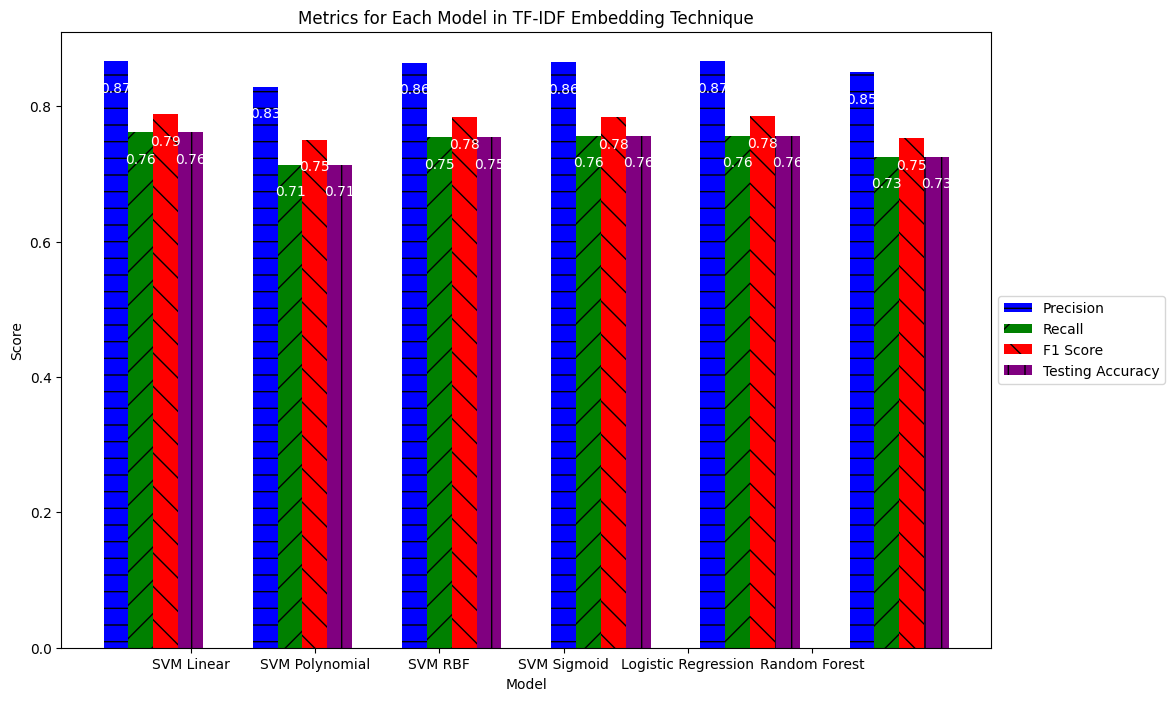

Charts displayed.


In [ ]:
# Loop through unique word embedding techniques
embedding_techniques = df['Word Embedding Technique'].unique()

for embedding_technique in embedding_techniques:
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))

    # Filter DataFrame for the current word embedding technique
    df_filtered = df[df['Word Embedding Technique'] == embedding_technique]

    if not df_filtered.empty:  # Check if DataFrame is not empty
        # Loop through unique models
        models = df_filtered['Model'].unique()

        # Define hatch patterns for each metric
        hatch_patterns = {'Precision': '-', 'Recall': '/', 'F1-Score': '\\', 'Testing Accuracy': '|'}

        # Plot precision, recall, f1, and accuracy for each model in a group
        for i, model in enumerate(models):
            df_model = df_filtered[df_filtered['Model'] == model]
            if not df_model.empty:  # Check if DataFrame for the model is not empty
                x_pos = i + 0.2 * (i - len(models) / 2)  # Adjust the position for each model

                # Plot precision bar with horizontal lines and specify label only once
                plt.bar(x_pos, df_model['Precision'].values[0], width=0.2, align='center', color='b', label='Precision' if i == 0 else None, hatch=hatch_patterns['Precision'])
                plt.text(x_pos, df_model['Precision'].values[0] - 0.05, f'{df_model["Precision"].values[0]:.2f}', ha='center', va='bottom', rotation=0, color='white')

                # Plot recall bar with diagonal lines towards right
                plt.bar(x_pos + 0.2, df_model['Recall'].values[0], width=0.2, align='center', color='g', label='Recall' if i == 0 else None, hatch=hatch_patterns['Recall'])
                plt.text(x_pos + 0.2, df_model['Recall'].values[0] - 0.05, f'{df_model["Recall"].values[0]:.2f}', ha='center', va='bottom', rotation=0, color='white')

                # Plot F1 Score bar with diagonal lines towards left
                plt.bar(x_pos + 0.4, df_model['F1-Score'].values[0], width=0.2, align='center', color='r', label='F1 Score' if i == 0 else None, hatch=hatch_patterns['F1-Score'])
                plt.text(x_pos + 0.4, df_model['F1-Score'].values[0] - 0.05, f'{df_model["F1-Score"].values[0]:.2f}', ha='center', va='bottom', rotation=0, color='white')

                # Plot Testing Accuracy bar with vertical lines
                plt.bar(x_pos + 0.6, df_model['Test Accuracy'].values[0], width=0.2, align='center', color='purple', label='Testing Accuracy' if i == 0 else None, hatch=hatch_patterns['Testing Accuracy'])
                plt.text(x_pos + 0.6, df_model['Test Accuracy'].values[0] - 0.05, f'{df_model["Test Accuracy"].values[0]:.2f}', ha='center', va='bottom', rotation=0, color='white')

        # Add labels and title
        plt.title(f'Metrics for Each Model in {embedding_technique} Embedding Technique')
        plt.xlabel('Model')
        plt.ylabel('Score')

        # Add x-axis ticks and labels
        plt.xticks(range(len(models)), models)

        # Add legend at the right side
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        # Display the chart
        plt.show()

# Display a message indicating that the charts are displayed
print("Charts displayed.")

**Without Undersampling**

Applying different SVC kernels, Random Forest and Logistic Regression

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
results = []

for model_name, model in classification_models.items():
    print(f"Training and evaluating {model_name}...")

    model_results = {'Word Embedding Technique': [], 'Test Accuracy': [],
                     'Precision': [], 'Recall': [], 'F1-Score': []}

    for embedding_technique in ['TF-IDF']:
        print(f"Applying {embedding_technique}...")

        # Initialize a new model variable for each embedding technique
        embedding_model = None

        if embedding_technique == 'TF-IDF':
            X_train, X_test = apply_tfidf(train_df['article'], test_df['article'])

# Train the model
        trained_model = train_model(X_train, train_df['category_code'], model)

        # Test Accuracy
        y_test_pred = trained_model.predict(X_test)
        test_accuracy = accuracy_score(test_df['category_code'], y_test_pred)



        # Calculate precision
        precision = precision_score(test_df['category_code'], y_test_pred, average='weighted')

        # Calculate recall
        recall = recall_score(test_df['category_code'], y_test_pred, average='weighted')

        # Calculate F1-score
        f1_score = f1_score(test_df['category_code'], y_test_pred, average='weighted')


        # Store results
        model_results['Word Embedding Technique'].append(embedding_technique)
        model_results['Test Accuracy'].append(test_accuracy)
        model_results['Precision'].append(precision)
        model_results['Recall'].append(recall)
        model_results['F1-Score'].append(f1_score)


    # Append model-specific results to the main results list
    results.append({model_name: model_results})

Training and evaluating SVM Linear...
Applying TF-IDF...
Training and evaluating SVM Polynomial...
Applying TF-IDF...


In [ ]:
# Save results to a table
results_df = pd.DataFrame()
for result in results:
    for model_name, model_result in result.items():
        temp_df = pd.DataFrame(model_result)
        temp_df['Model'] = model_name
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

# Save results to a CSV file
results_df.to_csv('notundersampled_classification_results.csv', index=False)

In [ ]:
# Loop through unique word embedding techniques
embedding_techniques = df['Word Embedding Technique'].unique()

for embedding_technique in embedding_techniques:
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 8))

    # Filter DataFrame for the current word embedding technique
    df_filtered = df[df['Word Embedding Technique'] == embedding_technique]

    if not df_filtered.empty:  # Check if DataFrame is not empty
        # Loop through unique models
        models = df_filtered['Model'].unique()

        # Define hatch patterns for each metric
        hatch_patterns = {'Precision': '-', 'Recall': '/', 'F1-Score': '\\', 'Testing Accuracy': '|'}

        # Plot precision, recall, f1, and accuracy for each model in a group
        for i, model in enumerate(models):
            df_model = df_filtered[df_filtered['Model'] == model]
            if not df_model.empty:  # Check if DataFrame for the model is not empty
                x_pos = i + 0.2 * (i - len(models) / 2)  # Adjust the position for each model

                # Plot precision bar with horizontal lines and specify label only once
                plt.bar(x_pos, df_model['Precision'].values[0], width=0.2, align='center', color='b', label='Precision' if i == 0 else None, hatch=hatch_patterns['Precision'])
                plt.text(x_pos, df_model['Precision'].values[0] - 0.05, f'{df_model["Precision"].values[0]:.2f}', ha='center', va='bottom', rotation=0, color='white')

                # Plot recall bar with diagonal lines towards right
                plt.bar(x_pos + 0.2, df_model['Recall'].values[0], width=0.2, align='center', color='g', label='Recall' if i == 0 else None, hatch=hatch_patterns['Recall'])
                plt.text(x_pos + 0.2, df_model['Recall'].values[0] - 0.05, f'{df_model["Recall"].values[0]:.2f}', ha='center', va='bottom', rotation=0, color='white')

                # Plot F1 Score bar with diagonal lines towards left
                plt.bar(x_pos + 0.4, df_model['F1-Score'].values[0], width=0.2, align='center', color='r', label='F1 Score' if i == 0 else None, hatch=hatch_patterns['F1-Score'])
                plt.text(x_pos + 0.4, df_model['F1-Score'].values[0] - 0.05, f'{df_model["F1-Score"].values[0]:.2f}', ha='center', va='bottom', rotation=0, color='white')

                # Plot Testing Accuracy bar with vertical lines
                plt.bar(x_pos + 0.6, df_model['Test Accuracy'].values[0], width=0.2, align='center', color='purple', label='Testing Accuracy' if i == 0 else None, hatch=hatch_patterns['Testing Accuracy'])
                plt.text(x_pos + 0.6, df_model['Test Accuracy'].values[0] - 0.05, f'{df_model["Test Accuracy"].values[0]:.2f}', ha='center', va='bottom', rotation=0, color='white')

        # Add labels and title
        plt.title(f'Metrics for Each Model in {embedding_technique} Embedding Technique')
        plt.xlabel('Model')
        plt.ylabel('Score')

        # Add x-axis ticks and labels
        plt.xticks(range(len(models)), models)

        # Add legend at the right side
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        # Display the chart
        plt.show()

# Display a message indicating that the charts are displayed
print("Charts displayed.")